In [102]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

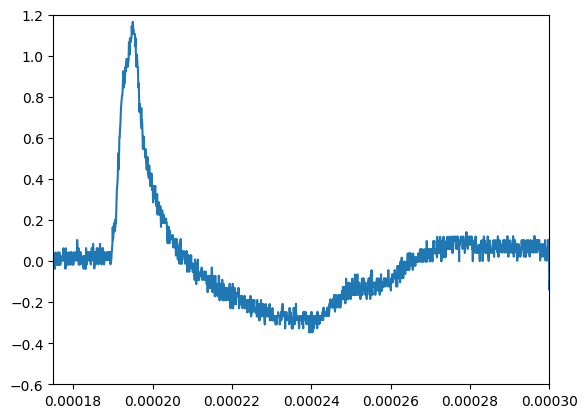

2187
3749


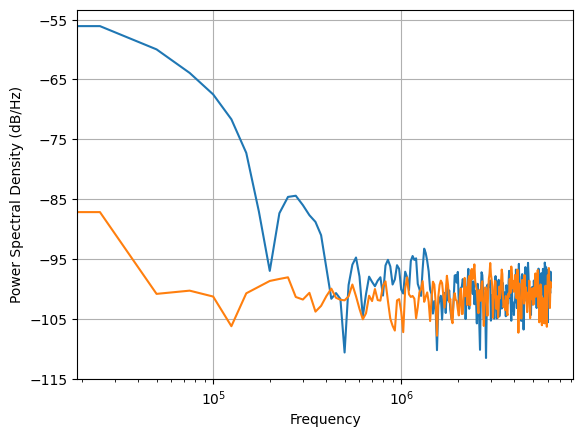

In [113]:
data = np.genfromtxt("../../data/20240822/hantekWaveData7018.csv", delimiter = ",")[1:]
data[:, 0] = np.linspace(0, 80e-9 * 4100, 4100)
data[:, 1][:3749] = scp.signal.detrend(data[:, 1][:3749] * -1, type = "linear", overwrite_data = True)
plt.xlim(1.75e-4, 3e-4)
plt.ylim(-0.6, 1.2)
plt.plot(data[:, 0], data[:, 1])
plt.show()
print(find_idx(data[:, 0], 0.000175))
print(find_idx(data[:, 0], 0.0003))
plt.psd(data[:, 1][2187:3749], 500, 1 / 80e-9)
plt.psd(data[:, 1][:2100], 500, 1 / 80e-9)
plt.xscale("log")

In [118]:
snr = 10 * np.log10(np.max(np.abs(data[:, 1][2187:3749])) / np.std(data[:, 1][:2187]))


16.50761491861313
